## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [25]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 2), reused 1 (delta 1), pack-reused 21
Receiving objects: 100% (25/25), 5.04 MiB | 13.74 MiB/s, done.
Resolving deltas: 100% (4/4), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/kmc/data/airbnb_hw.csv')
df = df.loc[:,['Price','Beds','Number Of Reviews', 'Review Scores Rating'] ]

print(df.head())

# cleaning price
df['Price'] = df['Price'].str.replace(',','') # need to replace commas in price
df['Price'] = pd.to_numeric(df['Price'],errors='coerce') # typecast price to float/numeric

# cleaning review scores rating
# print(df['Review Scores Rating'].unique())
# print(df['Review Scores Rating'].value_counts())
pd.crosstab(df['Review Scores Rating'].isnull(), df['Number Of Reviews']>0)
# need to drop all scores with 0 number of reviews

  Price  Beds  Number Of Reviews  Review Scores Rating
0   145   1.0                  0                   NaN
1    37   1.0                  1                   NaN
2    28   1.0                  1                   NaN
3   199   3.0                  0                   NaN
4   549   3.0                 39                  96.0


Number Of Reviews,False,True
Review Scores Rating,,
False,0,22155
True,7814,509


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).


In [27]:
# drop rows w missing values in crucial columns
df = df.dropna(subset=['Price','Beds','Number Of Reviews', 'Review Scores Rating'])

X = df.loc[:,['Beds','Number Of Reviews', 'Review Scores Rating'] ]

# normalize the data
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

X = df.apply(maxmin)

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.


In [28]:
from sklearn.cluster import KMeans # Import kmc

# this_plot = sns.scatterplot(data=df,x='Review Scores Rating',y='Number Of Reviews',hue='Beds') # Plot the data
# sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas

initial_centroids = np.random.randint(low=1,high=24,size=3) # Determine initial centroids
model = KMeans(n_clusters=6, max_iter=300, n_init = 10,  random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model

X['cluster'] = model.labels_ # Get the computed centers for the kmc model


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

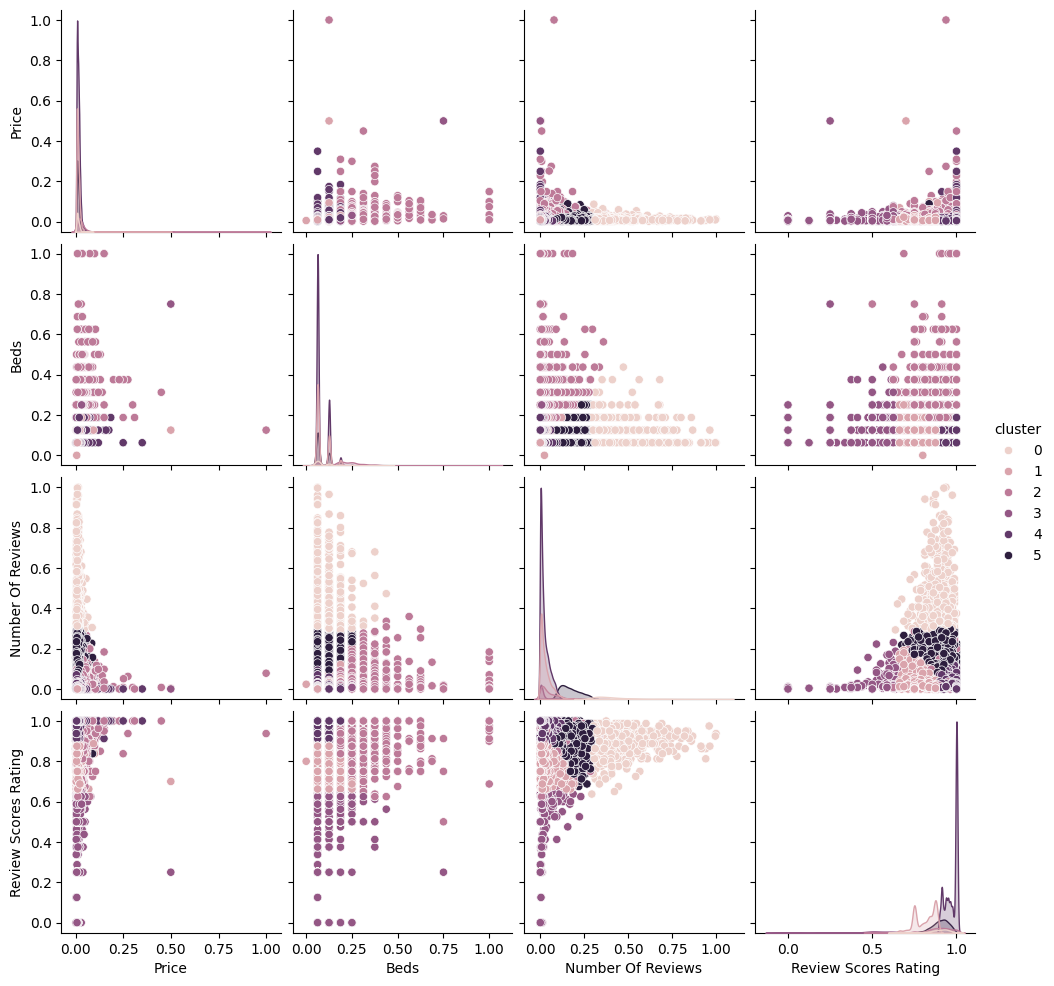

In [29]:
sns.pairplot(data = X, hue = 'cluster')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
> Cluster 0 and 4 have the highest rental prices


In [30]:
df['cluster'] = model.labels_
df.groupby('cluster').describe()

Price                                                              \
           count        mean         std   min    25%    50%    75%      max   
cluster                                                                        
0          793.0  133.311475   83.104413  27.0   80.0  110.0  169.0    875.0   
1         5554.0  131.587505  102.656375  20.0   75.0  110.0  169.0   5000.0   
2         1630.0  304.322699  364.089788  27.0  150.0  235.0  360.0  10000.0   
3          631.0  133.561014  215.675540  25.0   65.0   99.0  152.5   5000.0   
4        10476.0  150.621325  106.543738  10.0   85.0  130.0  190.0   3500.0   
5         3027.0  141.383878   83.812655  22.0   87.0  125.0  175.0   1000.0   

            Beds            ... Number Of Reviews        Review Scores Rating  \
           count      mean  ...               75%    max                count   
cluster                     ...                                                 
0          793.0  1.569987  ...             120.0  257.0                793.0   
1         5554.0  1.356320  ...              12.0   51.0               5554.0   
2         1630.0  4.185890  ...              21.0   93.0               1630.0   
3          631.0  1.657686  ...               4.0   60.0                631.0   
4        10476.0  1.287514  ...              10.0   33.0              10476.0   
5         3027.0  1.425834  ...              54.0   77.0               3027.0   

                                                                
              mean        std   min   25%    50%    75%    max  
cluster                                                         
0        91.881463   4.439955  71.0  89.0   93.0   95.0  100.0  
1        85.036370   4.859241  72.0  80.0   86.0   90.0   91.0  
2        91.776687   5.873368  60.0  88.0   93.0   96.0  100.0  
3        58.923930  12.993915  20.0  60.0   60.0   69.0   72.0  
4        97.648148   2.801348  92.0  95.0  100.0  100.0  100.0  
5        92.214734   3.936560  74.0  90.0   93.0   95.0  100.0  

[6 rows x 32 columns]

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.
> Trying 4 clusters based on scree plot

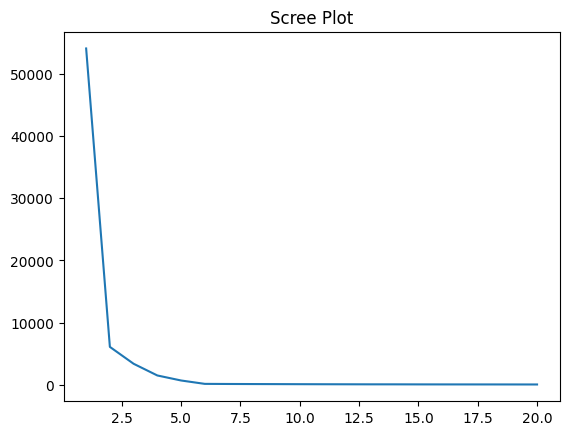

In [31]:
# Create a scree plot:
k_bar = 20
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

Price                                                              \
           count        mean         std   min    25%    50%    75%      max   
cluster                                                                        
0         2261.0  256.666519  338.209899  25.0  110.0  195.0  300.0  10000.0   
1        10476.0  150.621325  106.543738  10.0   85.0  130.0  190.0   3500.0   
2         6347.0  131.802899  100.417691  20.0   75.0  110.0  169.0   5000.0   
3         3027.0  141.383878   83.812655  22.0   87.0  125.0  175.0   1000.0   

            Beds            ... Number Of Reviews        Review Scores Rating  \
           count      mean  ...               75%    max                count   
cluster                     ...                                                 
0         2261.0  3.480318  ...              17.0   93.0               2261.0   
1        10476.0  1.287514  ...              10.0   33.0              10476.0   
2         6347.0  1.383016  ...              17.0  257.0               6347.0   
3         3027.0  1.425834  ...              54.0   77.0               3027.0   

                                                                
              mean        std   min   25%    50%    75%    max  
cluster                                                         
0        82.608138  17.005215  20.0  70.0   90.0   95.0  100.0  
1        97.648148   2.801348  92.0  95.0  100.0  100.0  100.0  
2        85.891602   5.314642  71.0  80.0   87.0   90.0  100.0  
3        92.214734   3.936560  74.0  90.0   93.0   95.0  100.0  

[4 rows x 32 columns]

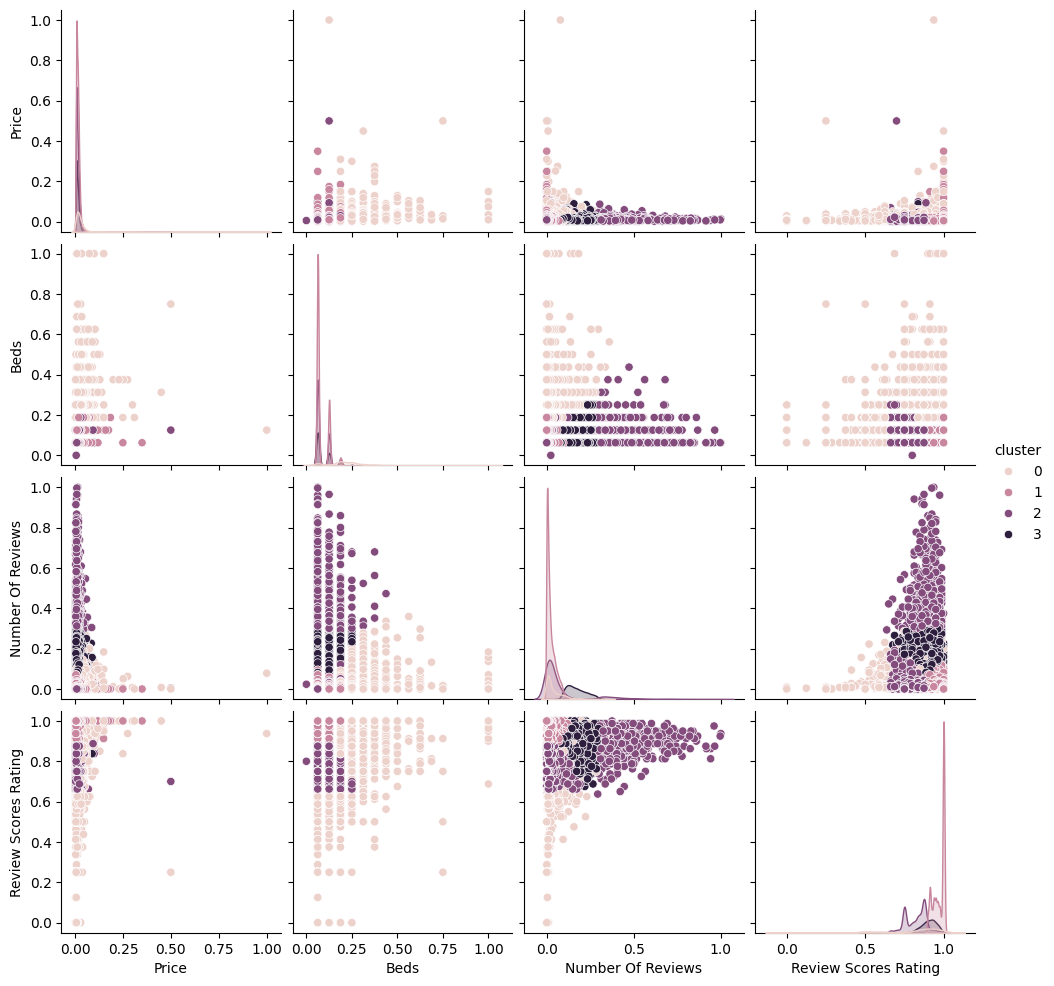

In [32]:
initial_centroids = np.random.randint(low=1,high=24,size=3) # Determine initial centroids
model = KMeans(n_clusters=4, max_iter=300, n_init = 10,  random_state=0) # Pass centroids and options into the model
model = model.fit(X) # Initialize a kmc model

X['cluster'] = model.labels_ # Get the computed centers for the kmc model

sns.pairplot(data = X, hue = 'cluster')
df['cluster'] = model.labels_
df.groupby('cluster').describe()

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
> The clusters appears less distinct, with an increase in the spread of the clusters as noise increases


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

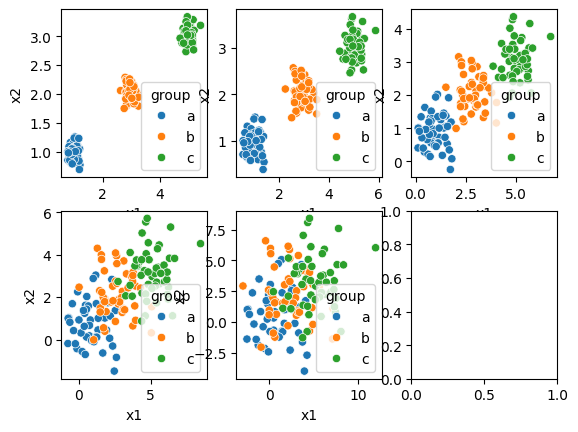

In [34]:


fig, axs = plt.subplots(2,3)
sns.scatterplot(data=df0_125,x='x1',y='x2',hue='group', ax=axs[0,0])
sns.scatterplot(data=df0_25,x='x1',y='x2',hue='group', ax=axs[0,1])
sns.scatterplot(data=df0_5,x='x1',y='x2',hue='group', ax=axs[0,2])
sns.scatterplot(data=df1_0,x='x1',y='x2',hue='group', ax=axs[1,0])
sns.scatterplot(data=df2_0,x='x1',y='x2',hue='group', ax=axs[1,1])


3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
> As noise increases, the elbow becomes smoother, making it more difficult to determine a $k$
4. Explain the intuition of the elbow, using this numerical simulation as an example.
> The elbow refers to the spot where reduction in SSE significantly slows down, which is a subjective measure. In the context of this example, when the amount of noise is 0.125, the optimal k is clearly defined as 3 while when the noise is increased to 2.0, the optimal k could be 6 or 7 or any close values as the plot is too smooth to interpret accurately. More noise causes the spreading out of the clusters such that they eventually overlap, meaning that an optimal number of clusters $k$ can no longer clearly be picked.

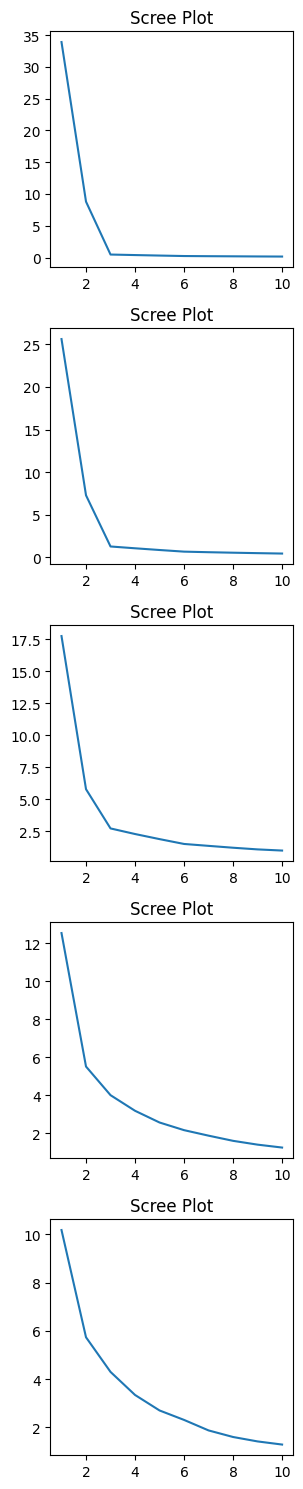

In [35]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

array_dfs = [df0_125, df0_25, df0_5, df1_0, df2_0]
fig, axs = plt.subplots(5, figsize=(3, 15))

for index, df in enumerate(array_dfs):
    df = df.loc[ : , ['x1','x2'] ]
    df = df.apply(maxmin)
    # Create a scree plot:
    k_bar = 10
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(df) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    scree_plot = sns.lineplot(x=k_grid, y=SSE, ax=axs[index]).set_title('Scree Plot')

plt.tight_layout()